# Results

## Linear Regression 
CV Score: 0.165 
Test Score: 0.16454088984181903

## Polynomial Regression
CV Score: 0.165 
Test Score: 0.1645408413852154

## SGD Regression
CV Score: 0.1634937630453061
Test Score: 0.16291008822896602

## Ridge Regression
CV Score: 0.16336144479033818
Test Score: 0.16454088913302967

## Lasso Regression
CV Score: 0.16305691570212932
Test Score: 0.16446225897094277

## Dtree Regression
CV Score:
Test Score:

## SVR 
CV Score:
Test Score:

In [726]:
import numpy as np
import pandas as pd

In [727]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [728]:
data = pd.read_csv('/Users/tapas/Downloads/Oil/Patent_Data_Variables.csv')


In [729]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
lag_y      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(15)
memory usage: 12.5 MB


In [730]:
data.drop(columns=['lag_y'],inplace=True)

In [731]:
#data['log_fwd'] = data['fwd'].apply(lambda x: np.log(x+0.001))
#cap_right = ['lag_d','noc','tbm','tbru']
#data['lag_d'] = data['lag_d'].apply(lambda x: np.log(x+0.001))
#data['noc'] = data['noc'].apply(lambda x: np.log(x+0.001))
#data['tbm'] = data['tbm'].apply(lambda x: np.log(x+0.001))
#data['tbru'] = data['tbru'].apply(lambda x: np.log(x+0.001))

In [732]:
from sklearn.model_selection import train_test_split
'''
X_train, X_test, y_train, y_test = train_test_split(data.drop(['log_fwd','fwd','ay','gy'], axis=1),
                                                    data['log_fwd'],
                                                    test_size=0.2,
                                                    random_state=0)
'''

X_train, X_test, y_train, y_test = train_test_split(data.drop(['fwd'], axis=1),
                                                    data['fwd'],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((52428, 23), (13107, 23))

In [733]:
#categorical=['ay','gy','firm','UMC','MSA','FT']
categorical=['firm','UMC','MSA','FT']

In [734]:
#npr 20/25
#Cent 20
#IT 25
'''
import matplotlib.pyplot as plt
from feature_engine.discretisers import EqualFrequencyDiscretiser
var = 'npr'

disc = EqualFrequencyDiscretiser(q=25, variables =var)
disc.fit(X_train)
train_t = disc.transform(X_train)
pd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()
print(disc.binner_dict_)
plt.ylabel('mean of fwd')
'''


"\nimport matplotlib.pyplot as plt\nfrom feature_engine.discretisers import EqualFrequencyDiscretiser\nvar = 'npr'\n\ndisc = EqualFrequencyDiscretiser(q=25, variables =var)\ndisc.fit(X_train)\ntrain_t = disc.transform(X_train)\npd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()\nprint(disc.binner_dict_)\nplt.ylabel('mean of fwd')\n"

In [735]:
#fpr
'''
import matplotlib.pyplot as plt 
from feature_engine.discretisers import EqualWidthDiscretiser
var ='fpr'

disc = EqualWidthDiscretiser(bins=15, variables =var)
disc.fit(X_train)
train_t = disc.transform(X_train)
pd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()
plt.ylabel('mean of fwd')
'''


"\nimport matplotlib.pyplot as plt \nfrom feature_engine.discretisers import EqualWidthDiscretiser\nvar ='fpr'\n\ndisc = EqualWidthDiscretiser(bins=15, variables =var)\ndisc.fit(X_train)\ntrain_t = disc.transform(X_train)\npd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()\nplt.ylabel('mean of fwd')\n"

In [736]:
import seaborn as sns
import scipy.stats as stats


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

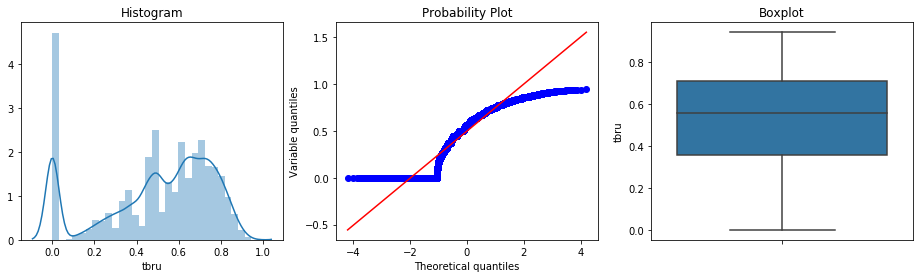

In [737]:
from feature_engine.outlier_removers import Winsorizer
cap_right = ['lag_d','noc','tbm']
#'npr','fpr','Cent','RT','3rd_PT']
cap_left = ['tbru']
#ouliers = ['npr','fpr','Cent','IT','RT','DT']

#gaussian,skewed,quantiles
#lag_d - gaussian right

winsorizer = Winsorizer(distribution='gaussian', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='left', # cap left, right or both tails 
                          fold=3,
                          variables=cap_left)

winsorizer.fit(X_train)
winsorizer.left_tail_caps_
winsorizer.right_tail_caps_
X_train_t = winsorizer.transform(X_train)
X_test_t = winsorizer.transform(X_test)
for variable in cap_left:
    diagnostic_plots(X_train_t, variable)

In [738]:
X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')
discrete = ['npr','fpr','Cent','IT']
drop_var = ['lag_y', 'fwd', 'log_fwd']
continuous=list(set(list(data.columns))-set(categorical) - set(discrete) -set(drop_var))
#X_train[dicrete] = X_train[dicrete].astype('O')
#X_test[dicrete] = X_test[dicrete].astype('O')

In [739]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from feature_engine.outlier_removers import Winsorizer
from sklearn.preprocessing import FunctionTransformer
from feature_engine.variable_transformers import LogTransformer
from feature_engine.missing_data_imputers import AddNaNBinaryImputer
from feature_engine.missing_data_imputers import EndTailImputer
from sklearn.impute import SimpleImputer



In [740]:
'''
patent_preprocess = Pipeline([
    
    ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',variables=['FS'])),
    ('capping_right',Winsorizer(distribution='gaussian',tail='right',fold=3,variables=cap_right)),
    ('capping_left',Winsorizer(distribution='gaussian',tail='left',fold=3,variables=cap_left)),
    ('capping_both',Winsorizer(distribution='gaussian',tail='both',fold=3,variables=continuous)),
    ('log_transform',LogTransformer(variables = cap_right)),
    ('equal_freq_disc1',EqualFrequencyDiscretiser(q=20, variables =['npr','Cent'])),
    ('equal_freq_disc2',EqualFrequencyDiscretiser(q=25, variables =['IT'])),
    ('equal_dist_disc',EqualWidthDiscretiser(bins=15, variables =['fpr'])),
    
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(tol=0.01,n_categories=6, variables=categorical )),
    ('One_hot', ce.OneHotCategoricalEncoder(variables=categorical)),
    ('missing_val_imputer',SimpleImputer(strategy='most_frequent')),
    #('categorical_enc', ce.OrdinalCategoricalEncoder(encoding_method='ordered', variables=categorical)),


   
    # categorical encoding 
     
])
'''


"\npatent_preprocess = Pipeline([\n    \n    ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),\n    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',variables=['FS'])),\n    ('capping_right',Winsorizer(distribution='gaussian',tail='right',fold=3,variables=cap_right)),\n    ('capping_left',Winsorizer(distribution='gaussian',tail='left',fold=3,variables=cap_left)),\n    ('capping_both',Winsorizer(distribution='gaussian',tail='both',fold=3,variables=continuous)),\n    ('log_transform',LogTransformer(variables = cap_right)),\n    ('equal_freq_disc1',EqualFrequencyDiscretiser(q=20, variables =['npr','Cent'])),\n    ('equal_freq_disc2',EqualFrequencyDiscretiser(q=25, variables =['IT'])),\n    ('equal_dist_disc',EqualWidthDiscretiser(bins=15, variables =['fpr'])),\n    \n    ('rare_label_enc', ce.RareLabelCategoricalEncoder(tol=0.01,n_categories=6, variables=categorical )),\n    ('One_hot', ce.OneHotCategoricalEncoder(variables=categorical)),\n    ('missi

In [741]:
patent_preprocess = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',variables=['FS'])),
    ('equal_freq_disc1',EqualFrequencyDiscretiser(q=20, variables =['npr','Cent'])),
    ('equal_freq_disc2',EqualFrequencyDiscretiser(q=25, variables =['IT'])),
    ('equal_dist_disc',EqualWidthDiscretiser(bins=15, variables =['fpr'])),
    ('capping_right',Winsorizer(distribution='gaussian',tail='right',fold=3,variables=cap_right)),
    ('capping_left',Winsorizer(distribution='gaussian',tail='left',fold=3,variables=cap_left)),
    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(tol=0.01,n_categories=6, variables=categorical )),
    #('categorical_enc', ce.OrdinalCategoricalEncoder(encoding_method='ordered', variables=categorical)),
    ('One_hot', ce.OneHotCategoricalEncoder(variables = categorical)),
     
])

In [742]:
patent_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['FS'])),
                ('equal_freq_disc1',
                 EqualFrequencyDiscretiser(q=20, return_object=False,
                                           variables=['npr', 'Cent'])),
                ('equal_freq_disc2',
                 EqualFrequencyDiscretiser(q=25, return_object=False,
                                           variables=['IT'])),
                ('equal_dist_disc',
                 EqualWidthDiscretiser(bins=15, return...
                            variables=['lag_d', 'noc', 'tbm'])),
                ('capping_left',
                 Winsorizer(distribution='gaussian', fold=3, tail='left',
                            variables=['tbru'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.01,
                                             variables=['

In [743]:
# Apply Transformations
X_train=patent_preprocess.transform(X_train)
X_test=patent_preprocess.transform(X_test)

In [744]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures


In [745]:
lr= LinearRegression()

In [746]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [747]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.17267338 0.17349531 0.16524642 0.14652794 0.15886418]
Average cross-validation score: 0.16


In [748]:
lr.score(X_train,y_train)

0.16759400300731764

In [749]:
lr.score(X_test,y_test)

0.16454088984181903

In [750]:
def add_const(X):
    #X['noc'] = X['noc'].apply(lambda x: np.log(x+0.001))
    return X+0.0001

In [751]:
model_gs = Pipeline([("Poly",PolynomialFeatures()),("add_constant",FunctionTransformer()),("regressor", LinearRegression())])


In [752]:

model_parm_gd = [
    
    #{'regressor': [LinearRegression()]},
    
    {   'Poly__degree':range(1,3),
      #'log_transformer':[FunctionTransformer(add_const,validate=True)], 
       'regressor': [LinearRegression()]},
]

In [753]:
grid_search_house_pipe = GridSearchCV(model_gs, model_parm_gd,cv=5)
grid_search_house_pipe.fit(X_train,y_train)

X_train_preds = grid_search_house_pipe.predict(X_train)
X_test_preds = grid_search_house_pipe.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

print("Best Mean Cross-validation score: {:.2f}".format(grid_search_house_pipe.best_score_))
print(grid_search_house_pipe.best_params_)



print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))


Best Mean Cross-validation score: 0.16
{'Poly__degree': 1, 'regressor': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}
train mse: 910.8968321460575
train rmse: 30.18106744543767
train r2: 0.16759400270431835

test mse: 981.4114235045838
test rmse: 31.327486709032115
test r2: 0.1645408413852154


In [754]:
from sklearn.preprocessing import MinMaxScaler

reg_sgd_pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('sgd_reg',SGDRegressor(max_iter=100,verbose=11,early_stopping=True,validation_fraction=0.2))
])

param_sgd = {'sgd_reg__learning_rate':['invscaling','adaptive'],
            'sgd_reg__penalty':['l2', 'l1', 'elasticnet'],
             'sgd_reg__alpha':[0.0001,0.0005,0.001],
             'sgd_reg__l1_ratio':[0.15,0.20,0.40,0.50,0.60],
             'sgd_reg__tol':[1e-4,1e-3]
            }
grid_sgd = GridSearchCV(reg_sgd_pipe,param_sgd,cv=5,n_jobs=-1,return_train_score=True)

grid_sgd.fit(X_train,y_train)

X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)



scores = cross_val_score(grid_sgd, X_train, y_train)
print("Cross-validation scores: {}".format(scores))

print("CV Score",grid_sgd.score(X_train, y_train))

print("Mean CV Score :",grid_sgd.best_score_)

print('train rmse',sqrt(mean_squared_error(y_train,X_train_preds)))
print("train r2: ", r2_score(y_train,X_train_preds))

print('test rmse',sqrt(mean_squared_error(y_test,X_test_preds)))
print("test r2: ", r2_score(y_test,X_test_preds))

print('best partams', grid_sgd.best_params_)

-- Epoch 1
Norm: 81.01, NNZs: 93, Bias: 19.716696, T: 41942, Avg. loss: 389.900196
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 94.78, NNZs: 90, Bias: 17.722189, T: 83884, Avg. loss: 384.747898
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 115.54, NNZs: 90, Bias: 18.158073, T: 125826, Avg. loss: 383.937690
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 129.37, NNZs: 86, Bias: 14.131356, T: 167768, Avg. loss: 383.144235
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 148.14, NNZs: 86, Bias: 10.737541, T: 209710, Avg. loss: 382.871197
Total training time: 0.21 seconds.
-- Epoch 6
Norm: 163.02, NNZs: 84, Bias: 11.616131, T: 251652, Avg. loss: 381.837385
Total training time: 0.25 seconds.
-- Epoch 7
Norm: 177.85, NNZs: 86, Bias: 11.781736, T: 293594, Avg. loss: 382.225232
Total training time: 0.29 seconds.
-- Epoch 8
Norm: 179.28, NNZs: 87, Bias: 10.414007, T: 335536, Avg. loss: 370.423293
Total training time: 0.33 seconds.
-- Epoch 9
Norm: 181.24, NNZs: 89, Bias: 11.

Norm: 158.06, NNZs: 94, Bias: 10.842933, T: 1241461, Avg. loss: 378.082068
Total training time: 1.29 seconds.
-- Epoch 38
Norm: 158.06, NNZs: 94, Bias: 10.839631, T: 1275014, Avg. loss: 378.081878
Total training time: 1.32 seconds.
-- Epoch 39
Norm: 158.06, NNZs: 94, Bias: 10.836098, T: 1308567, Avg. loss: 378.081367
Total training time: 1.36 seconds.
-- Epoch 40
Norm: 158.06, NNZs: 94, Bias: 10.833428, T: 1342120, Avg. loss: 378.081082
Total training time: 1.39 seconds.
-- Epoch 41
Norm: 158.06, NNZs: 94, Bias: 10.833596, T: 1375673, Avg. loss: 378.073819
Total training time: 1.43 seconds.
-- Epoch 42
Norm: 158.06, NNZs: 94, Bias: 10.833785, T: 1409226, Avg. loss: 378.073815
Total training time: 1.46 seconds.
-- Epoch 43
Norm: 158.06, NNZs: 94, Bias: 10.833890, T: 1442779, Avg. loss: 378.073781
Total training time: 1.50 seconds.
-- Epoch 44
Norm: 158.06, NNZs: 94, Bias: 10.834291, T: 1476332, Avg. loss: 378.073729
Total training time: 1.53 seconds.
-- Epoch 45
Norm: 158.06, NNZs: 94, 

Norm: 135.75, NNZs: 95, Bias: 12.698101, T: 838825, Avg. loss: 369.776085
Total training time: 1.19 seconds.
-- Epoch 26
Norm: 135.76, NNZs: 95, Bias: 12.680393, T: 872378, Avg. loss: 369.773653
Total training time: 1.23 seconds.
-- Epoch 27
Norm: 135.76, NNZs: 95, Bias: 12.689781, T: 905931, Avg. loss: 369.745296
Total training time: 1.28 seconds.
-- Epoch 28
Norm: 135.76, NNZs: 95, Bias: 12.694948, T: 939484, Avg. loss: 369.743088
Total training time: 1.32 seconds.
-- Epoch 29
Norm: 135.76, NNZs: 95, Bias: 12.699889, T: 973037, Avg. loss: 369.741967
Total training time: 1.37 seconds.
-- Epoch 30
Norm: 135.77, NNZs: 95, Bias: 12.701499, T: 1006590, Avg. loss: 369.741615
Total training time: 1.41 seconds.
-- Epoch 31
Norm: 135.77, NNZs: 95, Bias: 12.701924, T: 1040143, Avg. loss: 369.741448
Total training time: 1.46 seconds.
-- Epoch 32
Norm: 135.77, NNZs: 95, Bias: 12.701963, T: 1073696, Avg. loss: 369.733812
Total training time: 1.50 seconds.
-- Epoch 33
Norm: 135.77, NNZs: 95, Bias:

Norm: 188.00, NNZs: 91, Bias: 8.302140, T: 637526, Avg. loss: 365.436644
Total training time: 0.92 seconds.
-- Epoch 20
Norm: 188.06, NNZs: 91, Bias: 8.364302, T: 671080, Avg. loss: 364.871105
Total training time: 0.97 seconds.
-- Epoch 21
Norm: 188.10, NNZs: 91, Bias: 8.345459, T: 704634, Avg. loss: 364.838833
Total training time: 1.01 seconds.
-- Epoch 22
Norm: 188.14, NNZs: 91, Bias: 8.314775, T: 738188, Avg. loss: 364.834307
Total training time: 1.06 seconds.
-- Epoch 23
Norm: 188.19, NNZs: 91, Bias: 8.391299, T: 771742, Avg. loss: 364.828910
Total training time: 1.11 seconds.
-- Epoch 24
Norm: 188.23, NNZs: 91, Bias: 8.285237, T: 805296, Avg. loss: 364.818252
Total training time: 1.15 seconds.
-- Epoch 25
Norm: 188.25, NNZs: 91, Bias: 8.347862, T: 838850, Avg. loss: 364.693750
Total training time: 1.20 seconds.
-- Epoch 26
Norm: 188.26, NNZs: 91, Bias: 8.337147, T: 872404, Avg. loss: 364.684548
Total training time: 1.24 seconds.
-- Epoch 27
Norm: 188.27, NNZs: 91, Bias: 8.360517, 

In [755]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ridge_pipe = Pipeline([
        ('scaler',StandardScaler()),
        ('ridge_reg',Ridge())])

ridge_params = {'ridge_reg__alpha':[0.001, 0.01,0.05, 0.1, 0.25,0.5,1, 10,100,150]}

grid_ridge = GridSearchCV(ridge_pipe,ridge_params,cv=5,return_train_score = True)

grid_ridge.fit(X_train,y_train)

X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)


print('best params ',grid_ridge.best_params_)
scores = cross_val_score(grid_ridge, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print('Cv score ',grid_ridge.best_score_)

print('train rmse',sqrt(mean_squared_error(y_train,X_train_preds)))
print("train r2: ", r2_score(y_train,X_train_preds))

print('test rmse',sqrt(mean_squared_error(y_test,X_test_preds)))
print("test r2: ", r2_score(y_test,X_test_preds))
print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))


best params  {'ridge_reg__alpha': 0.001}
Cross-validation scores: [0.17267337 0.17349531 0.16524642 0.14646206 0.15886419]
Cv score  0.16336144479033818
train rmse 30.18106743994525
train r2:  0.16759400300728466
test rmse 31.327485813824357
test r2:  0.16454088913302967
Ridge Test Performance:  0.16454088913302967


In [756]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(selection='random',max_iter=10000)

param_lasso = {'alpha':[0.001, 0.01,0.05, 0.1, 0.25,0.5,1, 10,100,150]}

grid_lasso = GridSearchCV(lasso,param_lasso,cv=10, return_train_score = True)

grid_lasso.fit(X_train,y_train)

X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)

print('CV Score',grid_lasso.best_score_)
print('Train RMSE',sqrt(mean_squared_error(y_train,X_train_preds)))
print('Test RMSE',sqrt(mean_squared_error(y_test,X_test_preds)))
print('Test Score/R-Square',grid_lasso.score(X_test,y_test))

CV Score 0.16305691432488886
Train RMSE 30.181170562235852
Test RMSE 31.328960007636415
Test Score/R-Square 0.1644622580141789


In [757]:
#Took too long to run
'''
from sklearn.neighbors import KNeighborsRegressor

knn_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('knn_reg',KNeighborsRegressor(algorithm='auto'))
])

knn_params = {'knn_reg__weights':['uniform','distance'],
             'knn_reg__leaf_size': [5,10,20,30],
             'knn_reg__n_neighbors': [5,10,15],
             'knn_reg__p':[1,2,3]}

knn_reg_grid = GridSearchCV(knn_pipe,knn_params,cv=5,return_train_score = True)

knn_reg_grid.fit(X_train,y_train)

X_train_preds = knn_reg_grid.predict(X_train)
X_test_preds = knn_reg_grid.predict(X_test)

print("CV score ",knn_reg_grid.best_score_)
print("Best Params ",knn_reg_grid.best_params_)

print("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))
print("train R2/score",r2_score(y_train,X_train_preds))

print("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))
print("test R2/score",r2_score(y_test,X_test_preds))
'''



'\nfrom sklearn.neighbors import KNeighborsRegressor\n\nknn_pipe = Pipeline([\n    (\'scaler\',StandardScaler()),\n    (\'knn_reg\',KNeighborsRegressor(algorithm=\'auto\'))\n])\n\nknn_params = {\'knn_reg__weights\':[\'uniform\',\'distance\'],\n             \'knn_reg__leaf_size\': [5,10,20,30],\n             \'knn_reg__n_neighbors\': [5,10,15],\n             \'knn_reg__p\':[1,2,3]}\n\nknn_reg_grid = GridSearchCV(knn_pipe,knn_params,cv=5,return_train_score = True)\n\nknn_reg_grid.fit(X_train,y_train)\n\nX_train_preds = knn_reg_grid.predict(X_train)\nX_test_preds = knn_reg_grid.predict(X_test)\n\nprint("CV score ",knn_reg_grid.best_score_)\nprint("Best Params ",knn_reg_grid.best_params_)\n\nprint("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))\nprint("train R2/score",r2_score(y_train,X_train_preds))\n\nprint("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))\nprint("test R2/score",r2_score(y_test,X_test_preds))\n'

In [759]:
from sklearn.tree import DecisionTreeRegressor

dreg_pipe = Pipeline([
    ('dtree_reg',DecisionTreeRegressor())
])

dreg_params = {
    'dtree_reg__criterion':['mse'],
    'dtree_reg__splitter':['best'],
    'dtree_reg__max_depth':[20,30],
    'dtree_reg__min_samples_split':[4,8,12],
    'dtree_reg__min_samples_leaf' :[2,4,8],
    'dtree_reg__max_features':['auto']
}

dtree_reg_grid = GridSearchCV(dreg_pipe,dreg_params,cv=5,return_train_score = True)

dtree_reg_grid.fit(X_train,y_train)

X_train_preds = dtree_reg_grid.predict(X_train)
X_test_preds = dtree_reg_grid.predict(X_test)

print("CV score ",dtree_reg_grid.best_score_)
print("Best Params ",dtree_reg_grid.best_params_)

print("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))
print("train R2/score",r2_score(y_train,X_train_preds))

print("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))
print("test R2/score",r2_score(y_test,X_test_preds))

CV score  -0.03791402824122949
Best Params  {'dtree_reg__criterion': 'mse', 'dtree_reg__max_depth': 20, 'dtree_reg__max_features': 'auto', 'dtree_reg__min_samples_leaf': 8, 'dtree_reg__min_samples_split': 4, 'dtree_reg__splitter': 'best'}
train RMSE 25.49078047786185
train R2/score 0.4062108267959845
test RMSE 34.436203806362805
test R2/score -0.009496120801335106


In [ ]:
from sklearn.svm import SVR

svm_reg_pipe = Pipeline([
    ('svm_reg',SVR())
])

svm_reg_params = {
    'svm_reg__kernel':['linear','poly','rbf','sigmoid'],
    'svm_reg__degree':[3,4,5],
    'svm_reg__gamma': ['auto','scale'],
    'svm_reg__coef0':[2.0,4.0,10.0,15.0]
}

svm_reg_grid = GridSearchCV(svm_reg_pipe,svm_reg_params,cv=5,return_train_score = True)

svm_reg_grid.fit(X_train,y_train)

X_train_preds = svm_reg_grid.predict(X_train)
X_test_preds = svm_reg_grid.predict(X_test)

print("CV score ",svm_reg_grid.best_score_)
print("Best Params ",svm_reg_grid.best_params_)

print("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))
print("train R2/score",r2_score(y_train,X_train_preds))

print("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))
print("test R2/score",r2_score(y_test,X_test_preds))


In [ ]:
#took too long to run


model_parm_gd = [
    
    #{'regressor': [LinearRegression()]},
    
    {   'Poly__degree':range(1,2),
       'regressor': [LinearRegression()]},
    {   'Poly__degree':range(1,3),
        'regressor':[SGDRegressor(max_iter=1000,verbose=11,early_stopping=True,validation_fraction=0.2)],
        'regressor__learning_rate':['invscaling','adaptive'],
        'regressor__penalty':['l2', 'l1', 'elasticnet'],
        'regressor__alpha':[0.0001,0.0005,0.001],
        'regressor__l1_ratio':[0.15,0.20,0.40,0.50,0.60],
        'regressor__tol':[1e-4,1e-3]
    }
 
]

    { 'regressor': [Ridge()],
     'Poly__degree':range(1,3),
     'regressor__alpha':[10, 50,100],
    'regressor__solver':['auto']},
    
    { 'Poly__degree':range(1,3),
     'regressor': [Lasso()],
      'regressor__alpha':[1, 10,50]},


grid_search_house_pipe = GridSearchCV(model_gs, model_parm_gd,cv=5)
grid_search_house_pipe.fit(X_train,y_train)


# let's get the predictions
X_train_preds = grid_search_house_pipe.predict(X_train)
X_test_preds = grid_search_house_pipe.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

print("Best Mean Cross-validation score: {:.2f}".format(grid_search_house_pipe.best_score_))
print(grid_search_house_pipe.best_params_)



print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
